# WeRateDogs Data Wrangling Project

The scope of this project is as follows:

* Data wrangling, which consists of:
    * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    * Assessing data
    * Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [391]:
import pandas as pd
import requests
import os
import tweepy
import timeit
import json
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Step 1: Gathering

Gather each of the three pieces of data as described below in a Jupyter Notebook titled `wrangle_act.ipynb`:

1. The WeRateDogs Twitter archive stored in file `twitter_archive_enhanced.csv`

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [392]:
# 1. read the CSV file
df_arc = pd.read_csv('twitter-archive-enhanced.csv')
df_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [393]:
# 2-a. get "image_predictions.tsv" via HTTP by using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
          file.write(response.content)

In [394]:
# 2-b. read "image_predictions.tsv" file into a dataframe for future analysis
df_pred = pd.read_csv("image-predictions.tsv", sep="\t")
df_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [395]:
# 3-a. authorise the Twitter API
# TODO: remove tokens before submitting project
consumer_key = 'n0N4H1ImBi8EnbomKcen5PzPh'
consumer_secret = 'ZCuuC1QH4CX8HZK8S8LykVlb7aY1GuARaKcrYeHOgItzHTGgUe'
access_token = '99761802-BiRpX2tmvyOXPPirnPYbsNpL5tCA574N0HWApN7xp'
access_secret = 'o9sI5hNOH4patR1Yx4SxzU5ULagbzsGewIqqFHp9q8waE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# 3-b. get the json files and write into txt file
file_path = "tweet_json.txt"
queried_tweets = []

start = timeit.timeit()
print('starting time:', start)
with open(file_path, 'w') as file:
    for tweet_id in df_arc['tweet_id']:
        if tweet_id not in queried_tweets:
            try:
                tweet_json = api.get_status(tweet_id, tweet_mode='extended')._json
                json.dump(tweet_json, file)
                file.write('\n')
            except:
                e = sys.exc_info()[0]
                print("<p>Error: %s</p>" % e)
            queried_tweets.append(tweet_id)        
end = timeit.timeit()
print('ending time:', end)

starting time: 0.008917586999999116


Rate limit reached. Sleeping for: 250


<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'KeyboardInterrupt'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.err

Rate limit reached. Sleeping for: 630


<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>


Rate limit reached. Sleeping for: 622


<p>Error: <class 'tweepy.error.TweepError'></p>
ending time: 0.009351412000341952


In [396]:
# 3-c. read each line (tweet json) from txt file into dataframe, only necessary fields
df_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open(file_path, 'r') as file:
    for line in file.readlines():
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_json = df_json.append({'tweet_id': int(tweet_id),
                                  'retweet_count': int(retweet_count),
                                  'favorite_count': int(favorite_count)}, ignore_index=True)
        
df_json.head(3)

,tweet_id,retweet_count,favorite_count
0,892177421306343426,5736,31354
1,891815181378084864,3796,23627
2,891689557279858688,7908,39705


## Step 2: Assessing

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your `wrangle_act.ipynb` Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [397]:
df_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [398]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [399]:
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [400]:
df_arc.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [401]:
df_arc[df_arc['rating_numerator'] > 20].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [402]:
df_arc.rating_denominator.value_counts()
# only 23 of them != 10

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [403]:
df_arc[df_arc['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [404]:
df_arc.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Sky          1
Nida         1
Molly        1
General      1
Amélie       1
Name: name, Length: 957, dtype: int64

In [405]:
sum(df_arc.duplicated())

0

In [406]:
sum(df_arc.tweet_id.duplicated())

0

In [407]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [408]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [409]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [410]:
df_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [411]:
df_pred[(df_pred['p1_dog'] == False) & (df_pred['p2_dog'] == False) & (df_pred['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [412]:
sum(df_pred.duplicated())

0

In [413]:
sum(df_pred.tweet_id.duplicated())

0

In [414]:
sum(df_pred.jpg_url.duplicated())

66

In [415]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,5736,31354
1,891815181378084864,3796,23627
2,891689557279858688,7908,39705
3,891327558926688256,8535,37918
4,891087950875897856,2856,19090


In [416]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
tweet_id          2323 non-null object
retweet_count     2323 non-null object
favorite_count    2323 non-null object
dtypes: object(3)
memory usage: 54.6+ KB


In [417]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2323,2323,2323
unique,2323,1683,1989
top,667495797102141441,227,0
freq,1,6,163


In [418]:
sum(df_json.duplicated())

0

## Assessing Observations

### Quality
*Dirty Data - Completeness, Validity, Accuracy, Consistency Issues*

**Archive data**
- expanded_urls is missing for 59 rows
- IDs are float numbers, they could be integers: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
- timestamps must be datetime: timestamp, retweeted_status_timestamp
- rating_numerator & rating_denominator have some odd values in the Q4, potential reasons could be;
    - parsing errors
    - replied (count:78) or retweeted (count:181) tweets (naturally those tweets does not have any rating but only random numbers such as date)
- name column has lots of wrong values such as a, an, the, None
- name column has "None" value instead of being null

**Predefined Data**
- dublicated jpg --> 66
- count (2075) is less than archive data size 2356
- 324 predictions has always dog flag false

**JSON API data**
- count (2323) is less than archive data size 2356 and higher than pred data size 2075
- retweet_count & favorite_count must be integer not string
- tweet_id must be integer as it is on other data frames


### Tidiness
*Messy Data - Structural Issues*

- Archive data: doggo, floofer, pupper, puppo columns can be melt into one "age group" column
- Archive data: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are unnecessary
- All dataframes stored tweets with different type of valuable information, they could be merged into a single dataset.
- Predefined data: do we really need the all prediction numbers? what about storing the highest "dog" prediction instead? 

## Step 3: Cleaning

Clean each of the issues you documented while assessing. Perform this cleaning in `wrangle_act.ipynb` as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

##### Remove retweets from Archive dataframe

In [419]:
# store tweet IDs of retweets in a list
l_retweets_arc = df_arc[df_arc['retweeted_status_id'].notnull()]['tweet_id'].tolist()

# then remove those tweets from archive dataframe
df_arc = df_arc[~df_arc.tweet_id.isin(l_retweets_arc)]

In [420]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Remove reply tweets from Archive dataframe

In [421]:
# store tweet IDs of retweets in a list
l_replied_arc = df_arc[df_arc['in_reply_to_status_id'].notnull()]['tweet_id'].tolist()

# then remove those tweets from archive dataframe
df_arc = df_arc[~df_arc.tweet_id.isin(l_replied_arc)]

In [422]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

##### Drop unused columns from Archive dataframe: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [423]:
df_arc = df_arc.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                      'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], 
                     axis=1)

In [424]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


##### Change timestamp data type to datetime in Archive dataframe

In [425]:
df_arc['timestamp'] = pd.to_datetime(df_arc['timestamp'], format="%Y-%m-%d %H:%M:%S %z")

In [426]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 213.0+ KB


##### Merge doggo, floofer, pupper, puppo columns into one column in Archive dataframe

In [427]:
df_arc['doggo'].replace('None', '', inplace=True)
df_arc['floofer'].replace('None', '', inplace=True)
df_arc['pupper'].replace('None', '', inplace=True)
df_arc['puppo'].replace('None', '', inplace=True)

In [428]:
df_arc['stage'] = (df_arc['doggo'] + df_arc['floofer'] + 
                   df_arc['pupper'] + df_arc['puppo'])

In [429]:
df_arc['stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [430]:
df_arc = df_arc.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [431]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


##### Change tweet_id, retweet_count, favorite_count data type into int64 in Json dataframe

In [432]:
df_json['tweet_id'] = df_json['tweet_id'].astype(int)

In [433]:
df_json['retweet_count'] = df_json['retweet_count'].astype(int)

In [434]:
df_json['favorite_count'] = df_json['favorite_count'].astype(int)

In [435]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
tweet_id          2323 non-null int64
retweet_count     2323 non-null int64
favorite_count    2323 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


##### Fix wrong name column values on Archive dataframe: as a, an, the, None

In [436]:
df_arc['name'].replace('None', 'NaN', inplace=True)
df_arc['name'].replace('a', 'NaN', inplace=True)
df_arc['name'].replace('an', 'NaN', inplace=True)
df_arc['name'].replace('the', 'NaN', inplace=True)

In [437]:
df_arc.name.value_counts()

NaN        672
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Diogi        1
Pinot        1
Nigel        1
Newt         1
Amélie       1
Name: name, Length: 952, dtype: int64

In [438]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


##### "denominator =! 10" in - Archive data

In [439]:
print(df_arc[df_arc['rating_denominator'] != 10].text)
# there are only 17 tweets with incorrect denominator value, we can delete them

433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1843    Here we have an entire platoon of puppers. Tot...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dt

In [440]:
df_arc = df_arc.drop(df_arc[df_arc['rating_denominator'] != 10].index, axis=0)

print(df_arc[df_arc['rating_denominator'] != 10].text)

Series([], Name: text, dtype: object)


In [441]:
df_arc.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.080000e+03,2080.000000,2080.0
mean,7.367027e+17,11.698077,10.0
std,6.724699e+16,39.816875,0.0
min,6.660209e+17,0.000000,10.0
25%,6.767367e+17,10.000000,10.0
50%,7.097095e+17,11.000000,10.0
75%,7.880674e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [442]:
# now rating_denominator column is unnecessary, we can drop it
df_arc.drop('rating_denominator', axis=1, inplace=True)

In [443]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            2080 non-null int64
timestamp           2080 non-null datetime64[ns, UTC]
source              2080 non-null object
text                2080 non-null object
expanded_urls       2077 non-null object
rating_numerator    2080 non-null int64
name                2080 non-null object
stage               2080 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 146.2+ KB


##### Store only the highest probable dog breed prediction - Predefined Data

In [444]:
highest_prediction = []
confidence_ratio = []

for i in df_pred.index:
    if df_pred['p1_dog'][i] == True:
        highest_prediction.append(df_pred['p1'][i])
        confidence_ratio.append(df_pred['p1_conf'][i])
    elif df_pred['p2_dog'][i] == True:
        highest_prediction.append(df_pred['p2'][i])
        confidence_ratio.append(df_pred['p2_conf'][i])
    elif df_pred['p3_dog'][i] == True:
        highest_prediction.append(df_pred['p3'][i])
        confidence_ratio.append(df_pred['p3_conf'][i])
    else:
        highest_prediction.append('NaN')
        confidence_ratio.append('NaN')
    
df_pred['breed_prediction'] = highest_prediction
df_pred['breed_prediction_confidence'] = confidence_ratio

df_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_prediction,breed_prediction_confidence
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN


In [445]:
df_pred.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [446]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                       2075 non-null int64
jpg_url                        2075 non-null object
img_num                        2075 non-null int64
breed_prediction               2075 non-null object
breed_prediction_confidence    2075 non-null object
dtypes: int64(2), object(3)
memory usage: 81.2+ KB


## Step 4: Merging & Storing Data

All data frames store tweet data in different forms, therefore they can be merged into one dataframe before visualisation step.

In [447]:
df_master = pd.merge(df_arc, df_pred, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, df_json, how = 'left', on = ['tweet_id'])
df_master.to_csv('df_master.csv', encoding = 'utf-8')

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2079
Data columns (total 14 columns):
tweet_id                       2080 non-null int64
timestamp                      2080 non-null datetime64[ns, UTC]
source                         2080 non-null object
text                           2080 non-null object
expanded_urls                  2077 non-null object
rating_numerator               2080 non-null int64
name                           2080 non-null object
stage                          2080 non-null object
jpg_url                        1954 non-null object
img_num                        1954 non-null float64
breed_prediction               1954 non-null object
breed_prediction_confidence    1954 non-null object
retweet_count                  2065 non-null float64
favorite_count                 2065 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(8)
memory usage: 243.8+ KB


In [448]:
sum(df_master.duplicated())

0

In [449]:
sum(df_master.tweet_id.duplicated())

0

## Step 5: Visualisation & Analysis data

In this final step, first master data will be visualised and then insights will be documented.

[Text(0, 0, 'doggo'),
 Text(0, 0, 'puppo'),
 Text(0, 0, 'pupper'),
 Text(0, 0, 'floofer'),
 Text(0, 0, 'doggopuppo'),
 Text(0, 0, 'doggofloofer'),
 Text(0, 0, 'doggopupper')]

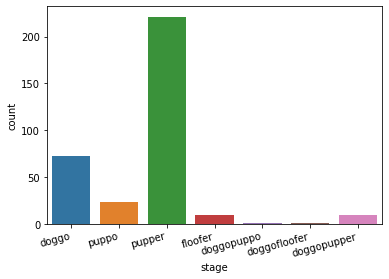

In [450]:
# first see the counts of stages
ax = sb.countplot(data = df_master[df_master['stage'] != ''], x = 'stage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='right')

[Text(0, 0, ''),
 Text(0, 0, 'doggo'),
 Text(0, 0, 'puppo'),
 Text(0, 0, 'pupper'),
 Text(0, 0, 'floofer'),
 Text(0, 0, 'doggopuppo'),
 Text(0, 0, 'doggofloofer'),
 Text(0, 0, 'doggopupper')]

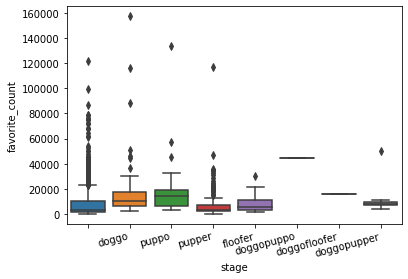

In [357]:
# puppers photos is the most shared photos
# now let's see the favorite_count per stage
ax = sb.boxplot(data = df_master, x = 'stage', y = 'favorite_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='right')

Text(0, 0.5, 'Rating Numerator')

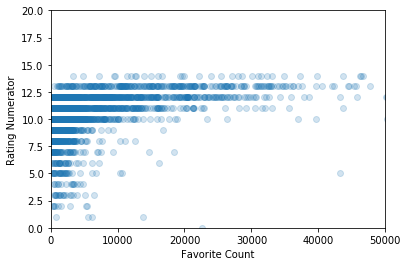

In [451]:
# even though pupper photos posted most frequently, highest favourite count belongs to doggo + puppo stage of dogs
# in the single stage dogs, still pupper is not the most favourited one, puppo is.

# now let's check the corralation between rating_numerator & favorite_count
plt.scatter(data = df_master, x = 'favorite_count', y = 'rating_numerator', alpha = 1/5)

# put limits to avoid outliers on the graph
plt.ylim(0, 20)
plt.xlim(0, 50000)
plt.xlabel('Favorite Count')
plt.ylabel('Rating Numerator')

Text(0, 0.5, 'Rating Numerator')

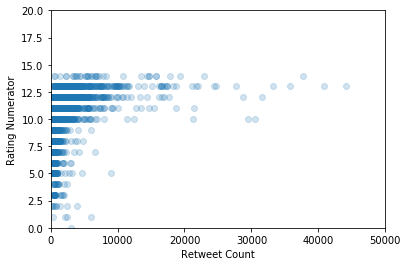

In [452]:
# there is an obvious positive correlation between 'favorite_count' and 'rating_numerator'

# what about rating_numerator & retweet_count
plt.scatter(data = df_master, x = 'retweet_count', y = 'rating_numerator', alpha = 1/5)

# put limits to avoid outliers on the graph
plt.ylim(0, 20) 
plt.xlim(0, 50000)
plt.xlabel('Retweet Count')
plt.ylabel('Rating Numerator')

In [386]:
# there is a positive correlation between 'retweet_count' and 'rating_numerator' too
# however this correlation is not as strong as 'favorite_count' and 'rating_numerator' correlation

# there are so many different breeds in our dataset, so it is so difficult to visualise them. 
# therefore, in order to understand most voted and most favorited breeds we will group data and get means.
df_mean = df_master.groupby(['breed_prediction']).mean().reset_index()

df_mean.sort_values(by=['favorite_count'], ascending=False)

,breed_prediction,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
6,Bedlington_terrier,7.843395e+17,10.333333,10.0,1.000000,7357.166667,23120.666667
55,Saluki,8.315403e+17,12.500000,10.0,1.000000,4455.666667,21134.333333
24,French_bulldog,7.841353e+17,11.193548,10.0,1.161290,4830.133333,18827.200000
12,Bouvier_des_Flandres,8.612885e+17,13.000000,10.0,1.000000,3928.000000,16550.000000
1,Afghan_hound,8.041621e+17,9.666667,10.0,1.000000,5252.333333,15864.000000
...,...,...,...,...,...,...,...
65,Tibetan_terrier,6.973258e+17,9.250000,10.0,1.000000,488.750000,1685.000000
35,Irish_wolfhound,6.717356e+17,11.000000,10.0,2.000000,727.000000,1399.000000
37,Japanese_spaniel,6.773010e+17,5.000000,10.0,1.000000,395.000000,1226.000000
91,groenendael,6.812840e+17,10.000000,10.0,1.000000,246.000000,1058.500000


In [387]:
# most favorited breeds are Bedlington_terrier, Saluki and French_bulldog (in order)

# now lets check retweet_count
df_mean.sort_values(by=['retweet_count'], ascending=False)

,breed_prediction,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
6,Bedlington_terrier,7.843395e+17,10.333333,10.0,1.000000,7357.166667,23120.666667
1,Afghan_hound,8.041621e+17,9.666667,10.0,1.000000,5252.333333,15864.000000
107,standard_poodle,7.406170e+17,10.727273,10.0,1.454545,4896.727273,12864.545455
24,French_bulldog,7.841353e+17,11.193548,10.0,1.161290,4830.133333,18827.200000
21,English_springer,7.153015e+17,10.500000,10.0,1.000000,4805.300000,13052.400000
...,...,...,...,...,...,...,...
22,EntleBucher,6.798621e+17,11.000000,10.0,1.000000,620.000000,2456.000000
65,Tibetan_terrier,6.973258e+17,9.250000,10.0,1.000000,488.750000,1685.000000
37,Japanese_spaniel,6.773010e+17,5.000000,10.0,1.000000,395.000000,1226.000000
13,Brabancon_griffon,6.725689e+17,10.000000,10.0,1.333333,254.333333,809.333333


In [388]:
# most favourited & retweeted breed is Bedlington_terrier

# what about ratings?
df_mean.sort_values(by=['rating_numerator'], ascending=False)

,breed_prediction,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
83,clumber,7.780270e+17,27.000000,10.0,1.000000,1651.000000,6676.000000
0,,7.170823e+17,16.167763,10.0,1.134868,2234.409241,6581.386139
12,Bouvier_des_Flandres,8.612885e+17,13.000000,10.0,1.000000,3928.000000,16550.000000
51,Pomeranian,7.183631e+17,12.536585,10.0,1.317073,2455.682927,7247.024390
55,Saluki,8.315403e+17,12.500000,10.0,1.000000,4455.666667,21134.333333
...,...,...,...,...,...,...,...
31,Ibizan_hound,6.844888e+17,9.250000,10.0,1.500000,1309.000000,2975.250000
66,Walker_hound,7.333173e+17,9.000000,10.0,1.200000,2345.200000,6020.400000
57,Scotch_terrier,6.892838e+17,9.000000,10.0,1.000000,1104.000000,3282.000000
106,soft-coated_wheaten_terrier,7.056062e+17,8.166667,10.0,1.083333,931.916667,3149.000000


In [ ]:
# clumber is the highest numerated breed in our data set :)

# Conclusion: Insights

### Stage Insights
- The most posted stage is `pupper`
- Even though pupper photos posted most frequently, highest favourite count belongs to `doggo + puppo` stage of dogs. In the single stage dogs, still pupper is not the most favourited one, `puppo` is.

### Counts vs Numerator
- There is an obvious positive correlation between `favorite_count and rating_numerator`
- There is a positive correlation between `retweet_count and rating_numerator` too. However this correlation is not as strong as 'favorite_count' and 'rating_numerator' correlation

### Breeds
- The most favorited breeds are `Bedlington_terrier, Saluki and French_bulldog` (in order)
- The most favourited & retweeted breed is `Bedlington_terrier`.
- `Clumber` is the highest numerated breed in our data set.